# Lem0n Grad

A 'from-scratch' notebook building gradient back-propagation in neural nets.

Inspired by Andrej Karpathy's video on [building micrograd](https://youtu.be/VMj-3S1tku0?si=bH1deIqbuXTTenGk)

## Understanding derivatives and gradient calculations of backprop

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Value:
  def __init__(self, data, _children=(), _op ='', label=''):
    self.data = data
    self. _prev = set(_children)
    self.grad = 0.0
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    return Value(self.data + other.data, (self, other), '+')

  def __mul__(self, other):
    return Value(self.data * other.data, (self, other), '*')

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad),
                 shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
L.grad = 1.0
f.grad = d.data
d.grad = f.data
c.grad = d.grad * 1.0
e.grad = d.grad * 1.0
b.grad = e.grad * a.data
a.grad = e.grad * b.data

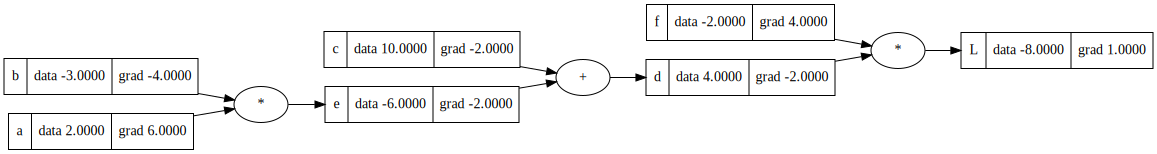

In [ ]:
draw_dot(L)

In [ ]:
def grad_test():
  h = 0.001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')

  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label = 'c')

  e = a*b; e.label = 'e'

  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)
grad_test()



-3.9999999999995595


## Building the Neuron

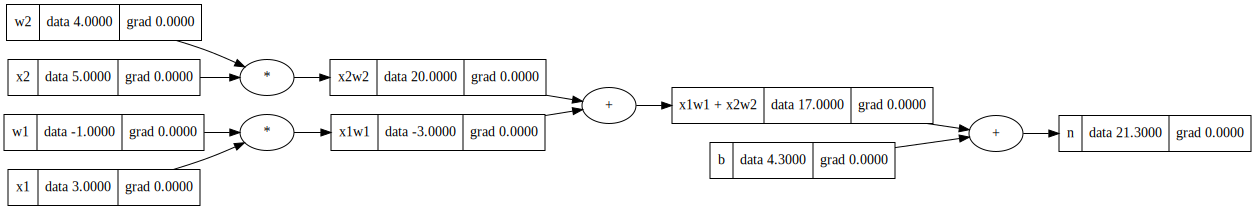

In [ ]:
#inputs
x1 = Value(3.0, label='x1')
x2 = Value(5.0, label='x2')

#weights
w1 = Value(-1.0, label='w1')
w2 = Value(4.0, label='w2')

#bias
b = Value(4.3, label='b')

#operations (x1 * w1 + x2 * w2 + b)

x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

draw_dot(n)
